# NB: Narrow vs Wide Tables

There are in general at least two ways to represent a dataset -- as a narrow table or as a set of wide tables.

Let's look at a very simple example.

In [9]:
import pandas as pd

In [10]:
pets = pd.Series("cat dog ferret snake turtle parraot".split()).sample(1000, replace=True).to_list()
people = pd.Series("A B C D E F G".split()).sample(1000, replace=True).to_list()   
NARROW = pd.DataFrame(dict(pet=pets, owner=people)).groupby(['owner', 'pet']).pet.count().to_frame('n')

This is a narrow table. 

It has few columns and many rows. 

Columns are types of things, and values in rows are either instances or subtypes.

In [8]:
NARROW

n
owner pet        
A     cat      32
      dog      28
      ferret   28
      parraot  22
      snake    21
      turtle   19
B     cat      24
      dog      26
      ferret   22
      parraot  24
      snake    21
      turtle   19
C     cat      29
      dog      15
      ferret   17
      parraot  25
      snake    25
      turtle   23
D     cat      25
      dog      22
      ferret   32
      parraot  17
      snake    21
      turtle   20
E     cat      23
      dog      25
      ferret   30
      parraot  23
      snake    25
      turtle   27
F     cat      25
      dog      26
      ferret   28
      parraot  27
      snake    29
      turtle   18
G     cat      23
      dog      27
      ferret   17
      parraot  21
      snake    22
      turtle   27

In [11]:
WIDE = NARROW.n.unstack()

This is a wide table. 

One column's values are projected onto the feature space (as columns).

The other column becomes a unique list (as is the feature space).

In [12]:
WIDE

pet,cat,dog,ferret,parraot,snake,turtle
owner,,,,,,
A,26,25,31,20,24,29
B,19,26,15,18,26,19
C,26,24,27,20,24,25
D,19,30,24,26,20,33
E,21,29,18,21,20,32
F,27,21,20,19,27,21
G,28,25,28,26,25,16


Narrow columns are more manageable by databases.

In fact, relational databases impose a limit on the number of columns you can have for a table, excluding high-dimensional spaces.

Wide columns are more usable for analysis.

You can do also these things with narrow tables using `.group_by()`

In [18]:
A = WIDE / WIDE.sum()

In [19]:
B = WIDE.T / WIDE.T.sum()

In [25]:
A.style.background_gradient()

pet,cat,dog,ferret,parraot,snake,turtle
owner,,,,,,
A,0.156627,0.138889,0.190184,0.133333,0.144578,0.165714
B,0.114458,0.144444,0.092025,0.120000,0.156627,0.108571
C,0.156627,0.133333,0.165644,0.133333,0.144578,0.142857
D,0.114458,0.166667,0.147239,0.173333,0.120482,0.188571
E,0.126506,0.161111,0.110429,0.140000,0.120482,0.182857
F,0.162651,0.116667,0.122699,0.126667,0.162651,0.120000
G,0.168675,0.138889,0.171779,0.173333,0.150602,0.091429


In [24]:
B.style.background_gradient()

owner,A,B,C,D,E,F,G
pet,,,,,,,
cat,0.167742,0.154472,0.178082,0.125000,0.148936,0.200000,0.189189
dog,0.161290,0.211382,0.164384,0.197368,0.205674,0.155556,0.168919
ferret,0.200000,0.121951,0.184932,0.157895,0.127660,0.148148,0.189189
parraot,0.129032,0.146341,0.136986,0.171053,0.148936,0.140741,0.175676
snake,0.154839,0.211382,0.164384,0.131579,0.141844,0.200000,0.168919
turtle,0.187097,0.154472,0.171233,0.217105,0.226950,0.155556,0.108108


In [26]:
NARROW.unstack()

n                                
pet   cat dog ferret parraot snake turtle
owner                                    
A      26  25     31      20    24     29
B      19  26     15      18    26     19
C      26  24     27      20    24     25
D      19  30     24      26    20     33
E      21  29     18      21    20     32
F      27  21     20      19    27     21
G      28  25     28      26    25     16

## 1 Hot Encoding

Project values onto the column axis.

In [44]:
# pd.get_dummies?

In [45]:
pd.get_dummies(WIDE.cat)

,19,21,26,27,28
owner,,,,,
A,0,0,1,0,0
B,1,0,0,0,0
C,0,0,1,0,0
D,1,0,0,0,0
E,0,1,0,0,0
F,0,0,0,1,0
G,0,0,0,0,1


In [52]:
pd.get_dummies(NARROW.n)

15  16  18  19  20  21  24  25  26  27  28  29  30  31  32  33
owner pet                                                                    
A     cat       0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
      dog       0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
      ferret    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
      parraot   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
      snake     0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
      turtle    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
B     cat       0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
      dog       0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
      ferret    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
      parraot   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
      snake     0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
      turtle    0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
C     cat       0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
      dog       0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
      ferret    0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
      parraot   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
      snake     0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
      turtle    0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
D     cat       0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
      dog       0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
      ferret    0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
      parraot   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
      snake     0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
      turtle    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
E     cat       0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
      dog       0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
      ferret    0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
      parraot   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
      snake     0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
      turtle    0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
F     cat       0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
      dog       0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
      ferret    0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
      parraot   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
      snake     0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
      turtle    0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
G     cat       0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
      dog       0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
      ferret    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
      parraot   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
      snake     0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
      turtle    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0

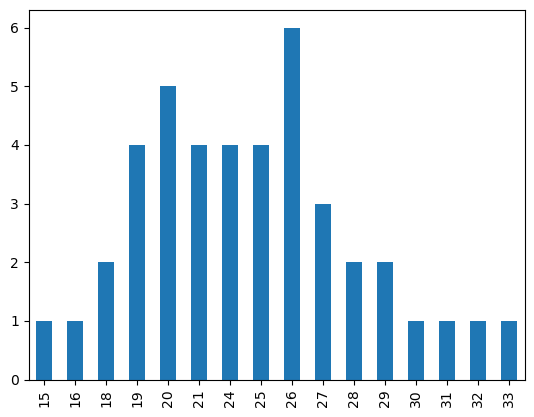

In [53]:
pd.get_dummies(NARROW.n).sum().plot.bar();